In [9]:
# preamble
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import pint
u = pint.UnitRegistry()

# load and plot data

In [7]:
# load data
data_dir = '/Users/doddgray/Google Drive/data' # <====== change this
fname = 'IMEC_ring_thermal_relaxation_data_usec_K.npy'
fpath = path.normpath(path.join(data_dir,fname))
data  = np.load(fpath)
t = data[:,0] * u.us
ΔT = data[:,1] * u.degK

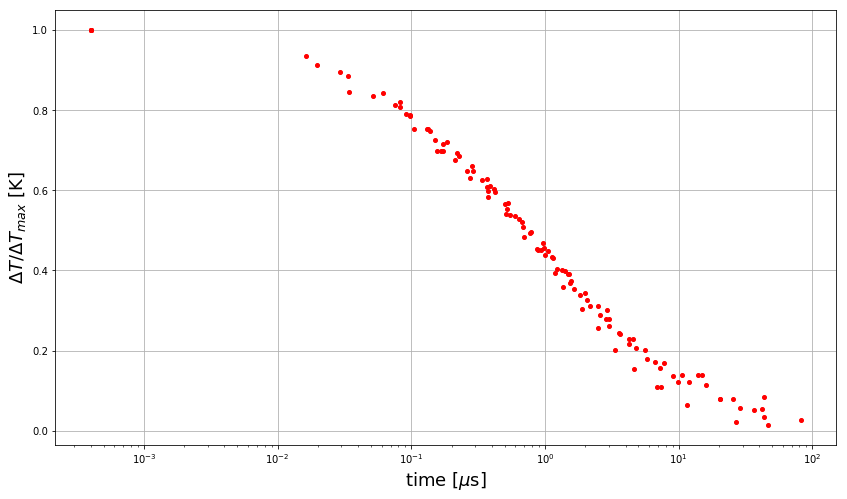

In [15]:
# plot data
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
ax.semilogx(t,ΔT,'r.')
ax.grid()
ax.set_xlabel('time [$\mu$s]')
ax.set_ylabel('$\Delta T/\Delta T_{max}$ [K]')

# fitting

In [24]:
# fit normalized thermo-optic detuning to exp(t/tau)

def func(t,tau):
    return np.exp(-t/tau)
p0 = (0.6) # 

p_opt,p_cov = curve_fit(func,t.m,ΔT.m,p0=p0,epsfcn=1e-8,maxfev=3000,xtol=1e-10,ftol=1e-10,gtol=1e-10)

t_fit = np.logspace(-4,2,300) # us
ΔT_fit = func(t_fit,*p_opt)

tau_fit = p_opt[0]

print(f'tau_fit: {tau_fit:3.1f}')


tau_fit: 1.2


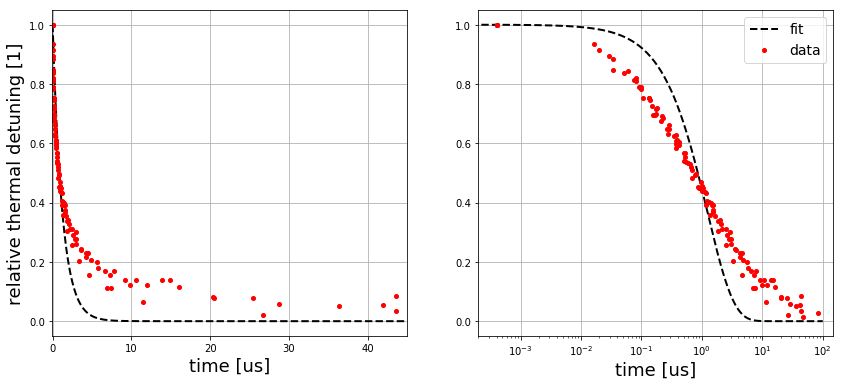

In [26]:
# plot extracted normalized thermo-optic detuning on linear and log scales side-by-side with fit curves
fig = plt.figure(figsize=(14,6))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

# linear plot
ax0.plot(t_fit,ΔT_fit,'k--',label=f'fit')
ax0.plot(t,ΔT,'r.')
ax0.set_ylabel('relative thermal detuning [1]')
ax0.set_xlabel('time [us]')
#ax0.set_xlim([-0.5,45])
# ax0.set_xlim([-0.5,50])
ax0.set_xlim([-0.05,45])
ax0.grid()

# loglog plot
# ax1.loglog(t_fit,df_fit,'k--',label=f'fit,τ={tau_fit:3.1f}us')
# ax1.loglog(t_relax,delta_f_norm,'r.',label='data')
ax1.semilogx(t_fit,ΔT_fit,'k--',label=f'fit')
ax1.semilogx(t,ΔT,'r.',label='data')
ax1.set_ylim([1,180])
ax1.set_xlabel('time [us]')
ax1.legend()
ax1.set_ylim([-0.05,1.05])
ax1.set_xlim([2e-4,150])
ax1.grid()

# Lumerical modeling of thermal relaxation

# material parameter considerations

In [17]:
# define variables for relevant, unitful material parameters
rho_si = 2.33 * u.gram / u.cm**3 # density
c_p_si = 0.7 * u.joule / u.degK / u.gram # specific heat capacity near 300K
k_si = 1.3 * u.watt / u.cm / u.degK # thermal conductivity near 300K
C_si = (rho_si * c_p_si).to(u.joule / u.degK / u.cm**3) # volumetric heat capacity near 300K
alpha_si = (k_si / C_si).to(u.cm**2 / u.second) # thermal diffusivity
print('C_si: {:3.3g} J K^-1 cm^-3'.format(C_si.m))
print('alpha_si: {:3.3g} cm^2 / s'.format(alpha_si.m))


rho_glass = 2.2 * u.gram / u.cm**3 # density
c_p_glass = 0.7 * u.joule / u.degK / u.gram # specific heat capacity near 300K
k_glass = 1.38e-2 * u.watt / u.cm / u.degK
C_glass = (rho_glass * c_p_glass).to(u.joule / u.degK / u.cm**3) # volumetric heat capacity near 300K
alpha_glass = (k_glass / C_glass).to(u.cm**2 / u.second) # thermal diffusivity
print('C_glass: {:3.3g} J K^-1 cm^-3'.format(C_glass.m))
print('alpha_glass: {:3.3g} cm^2 / s'.format(alpha_glass.m))

lm = 1550*u.nm
omega = (2*np.pi * u.speed_of_light / lm).to(1/u.second)
dn_dT = 1.8e-4 / u.degK # at 1550nm, 300K
gamma = 3.1e-9 * u.cm / u.watt # = (2 \pi n_2 / \lambda) at 1550nm, from Ryan's older (arXiv version paper)
delta_T = (omega / u.speed_of_light * dn_dT).to(1/u.degK/u.cm)
n_g = 3.97 # from experiment, 600GHz FSR for 40um diameter ring
v_g = u.speed_of_light / n_g
#tau_ph = 80 * u.ps # from experiment on overcoupled cavity
tau_ph = 415 * u.ps # from experiment on undercoupled cavity
zeta = (delta_T / ( 2 * C_si * gamma * v_g )).to(u.dimensionless).m
print('zeta: {:3.3g}'.format(zeta))
xi_T = (1/( delta_T * v_g * tau_ph )).to(u.degK)
print('xi_T: {:3.3g} K'.format(xi_T.m))

# using r**2/(4*alpha*t) as the heat  parameter, calculate t for a given r (distance magnitude)
t_200nm_si = ((200 * u.nm)**2 / ( 4 * alpha_si )).to(u.ps)
t_2um_glass = ((2 * u.um)**2 / ( 4 * alpha_glass )).to(u.us)
t_40um_si = ((40 * u.um)**2 / ( 4 * alpha_si )).to(u.us)
t_40um_glass = ((40 * u.um)**2 / ( 4 * alpha_glass )).to(u.us)
print('t_200nm_si: {:3.1f} ps'.format(t_200nm_si.to(u.ps).m))
print('t_2um_glass: {:3.1f} us'.format(t_2um_glass.to(u.us).m))
print('t_40um_si: {:3.1f} us'.format(t_40um_si.to(u.us).m))
print('t_40um_glass: {:3.1f} us'.format(t_40um_glass.to(u.us).m))

C_si: 1.63 J K^-1 cm^-3
alpha_si: 0.797 cm^2 / s
C_glass: 1.54 J K^-1 cm^-3
alpha_glass: 0.00896 cm^2 / s
zeta: 0.0956
xi_T: 0.0437 K
t_200nm_si: 125.5 ps
t_2um_glass: 1.1 us
t_40um_si: 5.0 us
t_40um_glass: 446.4 us
